In [1]:
# Load packages and DF
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mitbih_test_df = pd.read_csv("mitbih_test.csv")
mitbih_train_df = pd.read_csv("mitbih_train.csv")

In [2]:
# MIT-BIH Train DF
new_column_names = range(1, len(mitbih_train_df.columns) + 1)
mitbih_train_df.columns = new_column_names
mitbih_train_df[188]=mitbih_train_df[188].astype(int)
mitbih_train_df.describe()
mitbih_train_df[188].value_counts()

188
0    72470
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [3]:
# MIT-BIH Test DF
new_column_names = range(1, len(mitbih_test_df.columns) + 1)
mitbih_test_df.columns = new_column_names
mitbih_test_df[188]=mitbih_test_df[188].astype(int)
mitbih_test_df.info()
# mitbih_test_df[188].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Columns: 188 entries, 1 to 188
dtypes: float64(187), int64(1)
memory usage: 31.4 MB


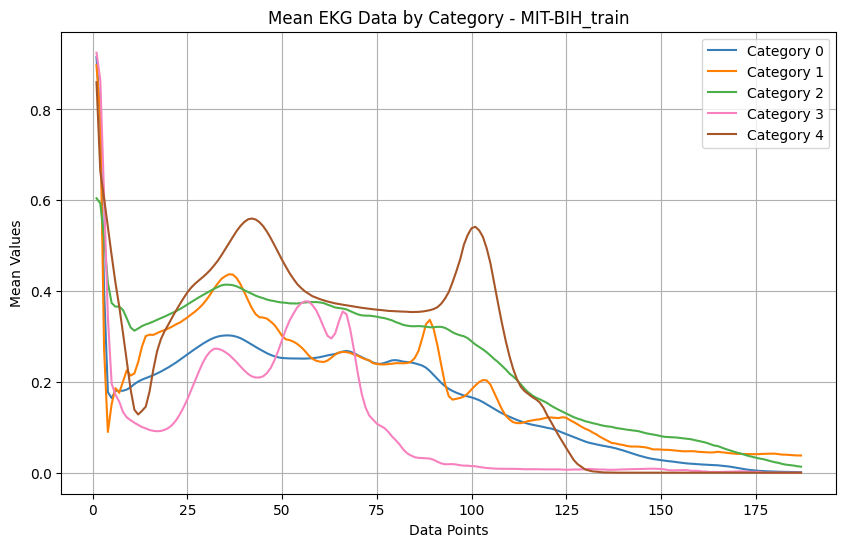

In [4]:
# Grafic representation of the Categories - MIT-BIH - Train
# Group by the category in the column named '188'
grouped = mitbih_train_df.groupby(188)
# Calculate the mean for each category across the 187 columns
means = grouped.mean()
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']
# Plot the means for each category
plt.figure(figsize=(10, 6))
for i, category in enumerate(means.index):
    plt.plot(range(1, 188), means.loc[category], label=f'Category {category}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - MIT-BIH_train')
plt.legend()
plt.grid(True)
plt.show()

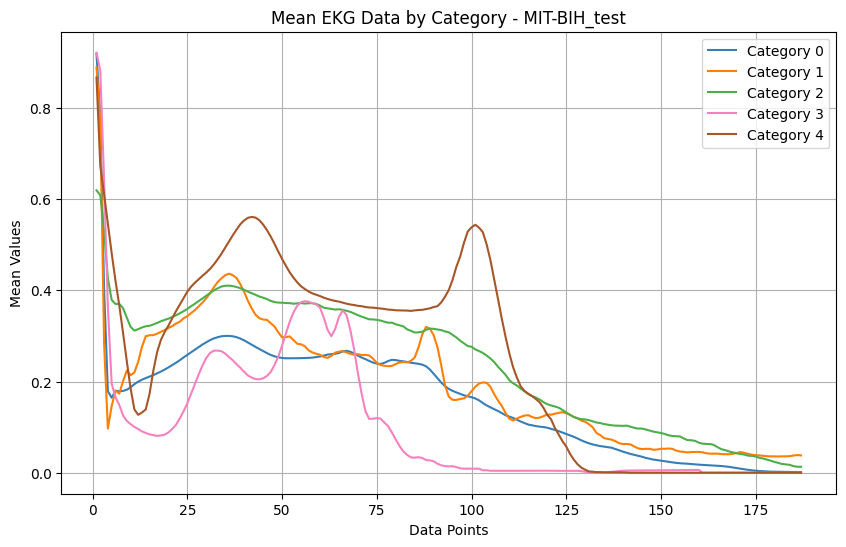

In [5]:
# Grafic representation of the Categories - MIT-BIH- Test
# Group by the category in the column named '188'
grouped = mitbih_test_df.groupby(188)
# Calculate the mean for each category across the 187 columns
means = grouped.mean()
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']
# Plot the means for each category
plt.figure(figsize=(10, 6))
for i, category in enumerate(means.index):
    plt.plot(range(1, 188), means.loc[category], label=f'Category {category}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - MIT-BIH_test')
plt.legend()
plt.grid(True)
plt.show()

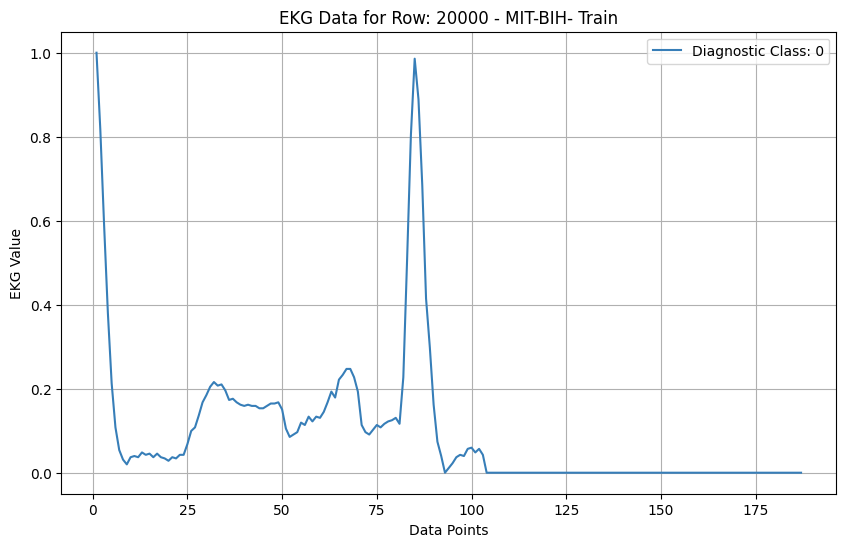

In [6]:
# MIT-BIH Train - Single row plot

#Choose Row to display: 
row_to_display = 20000

plt.figure(figsize=(10, 6))
plt.plot(range(1, 188), mitbih_train_df.iloc[row_to_display, :187], 
         label = f"Diagnostic Class: {mitbih_train_df.iloc[row_to_display, 187]}", color='#377eb8')
plt.xlabel('Data Points')
plt.ylabel('EKG Value')
plt.title(f'EKG Data for Row: {row_to_display} - MIT-BIH- Train')
plt.legend()
plt.grid(True)
plt.show();

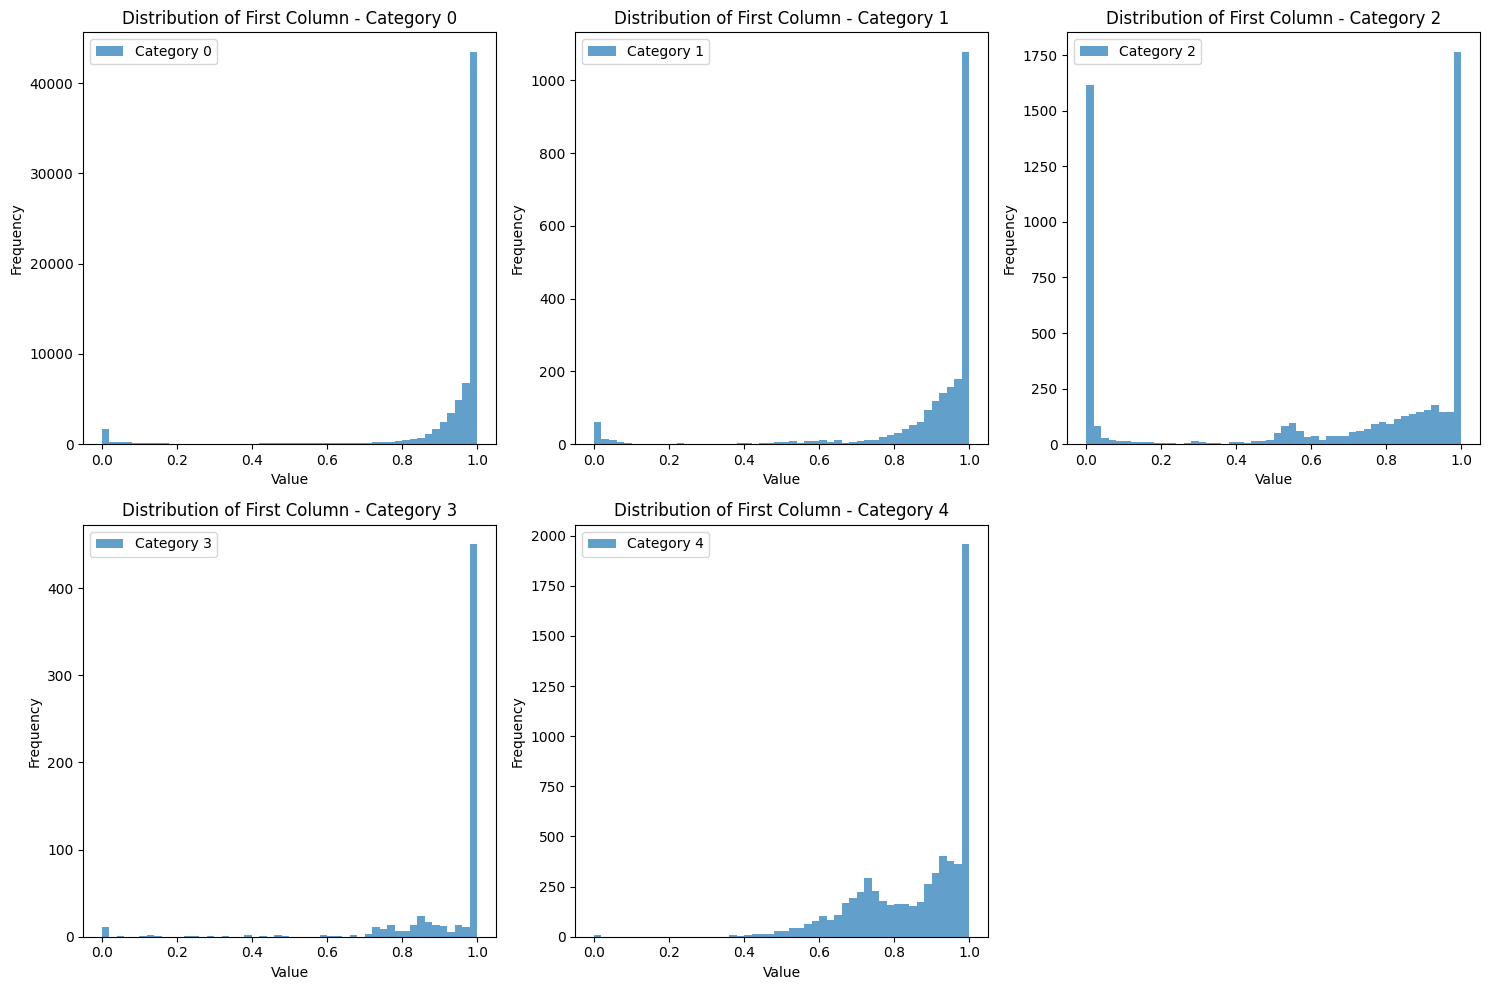

In [7]:
# Displaying the first row - Plotting distributions for each category
plt.figure(figsize=(15, 10))

categories = mitbih_train_df[188].unique()
num_categories = len(categories)

for i, category in enumerate(categories):
    plt.subplot(2, 3, i + 1)
    subset_df = mitbih_train_df[mitbih_train_df[188] == category]
    plt.hist(subset_df.iloc[:, 0], bins=50, alpha=0.7, label=f'Category {category}')
    plt.title(f'Distribution of First Column - Category {category}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

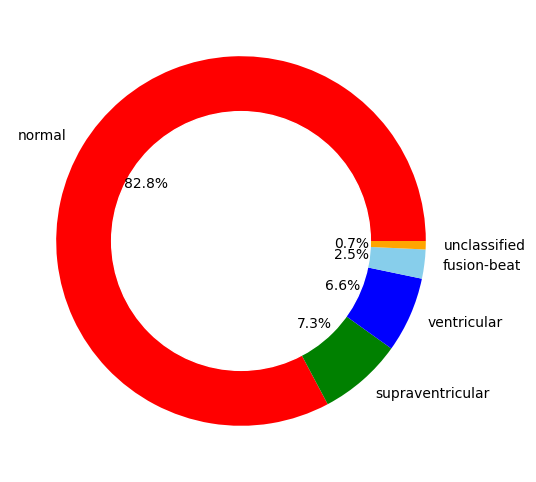

In [8]:
# Distribution of Classes in MIT-BIH-Train
mitbih_train_df[188]=mitbih_train_df[188].astype(int)
equilibre=mitbih_train_df[188].value_counts()
# equilibre.head()

plt.figure(figsize=(12,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=["normal", "supraventricular", "ventricular", "fusion-beat", "unclassified"], 
        colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show();

In [9]:
# 2D-Histogram for classes; Density of Data Distribution
def plot_hist(class_number, size, min_, bins):
    img = mitbih_train_df.loc[mitbih_train_df[188] == class_number].values[:, min_:size]
    img_flatten = img.flatten()
    final1 = np.tile(np.arange(min_, size), img.shape[0])
    
    print(len(final1))
    print(len(img_flatten))
    
    plt.figure(figsize=(12, 6))
    plt.hist2d(final1, img_flatten, bins=(bins, bins), cmap=plt.cm.jet)
    plt.colorbar()
    plt.show()

4710550
4710550


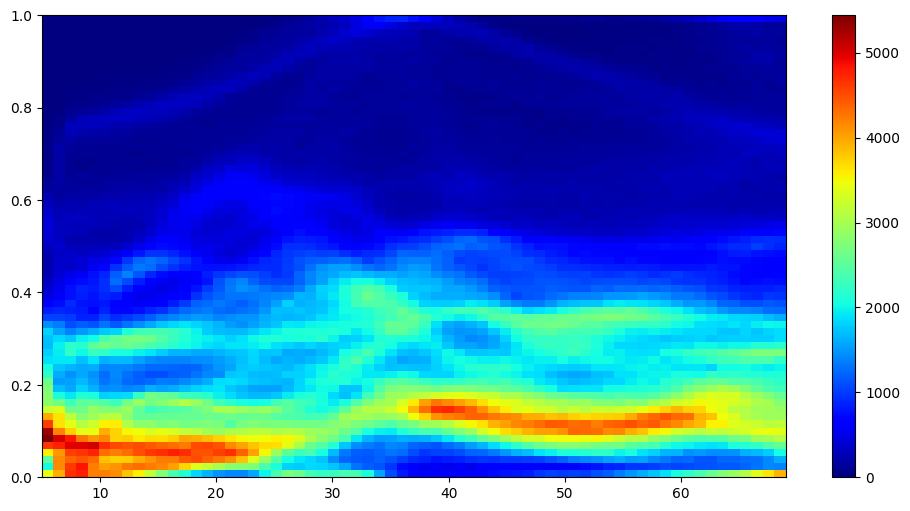

In [10]:
plot_hist(0,70,5,65)

100035
100035


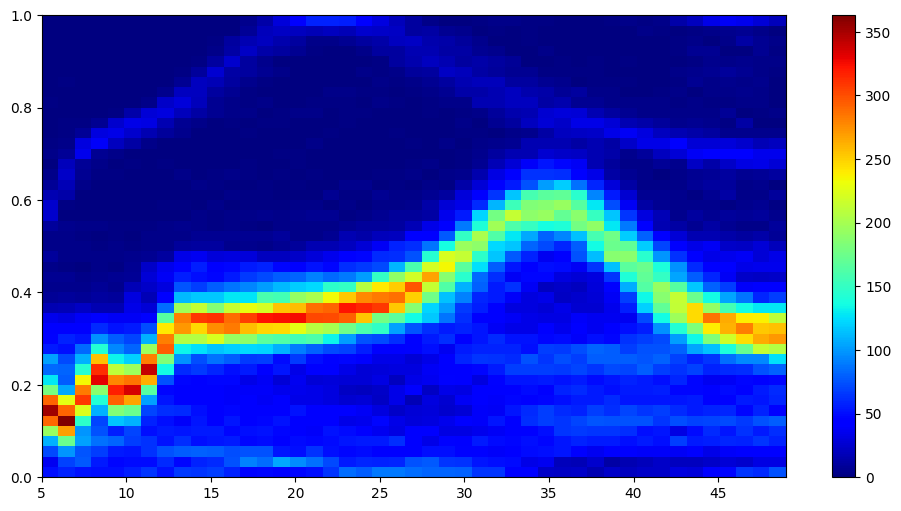

In [11]:
plot_hist(1,50,5,45)

260460
260460


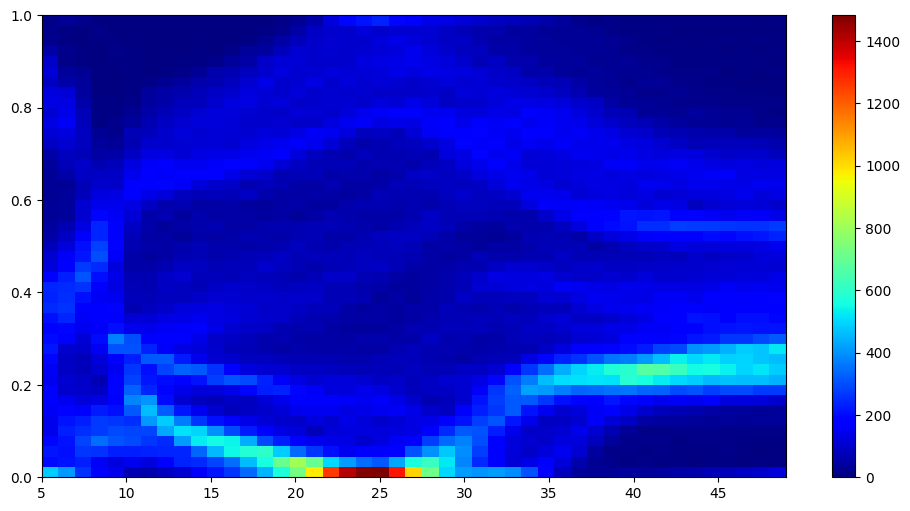

In [12]:
plot_hist(2,50,5,45)

28845
28845


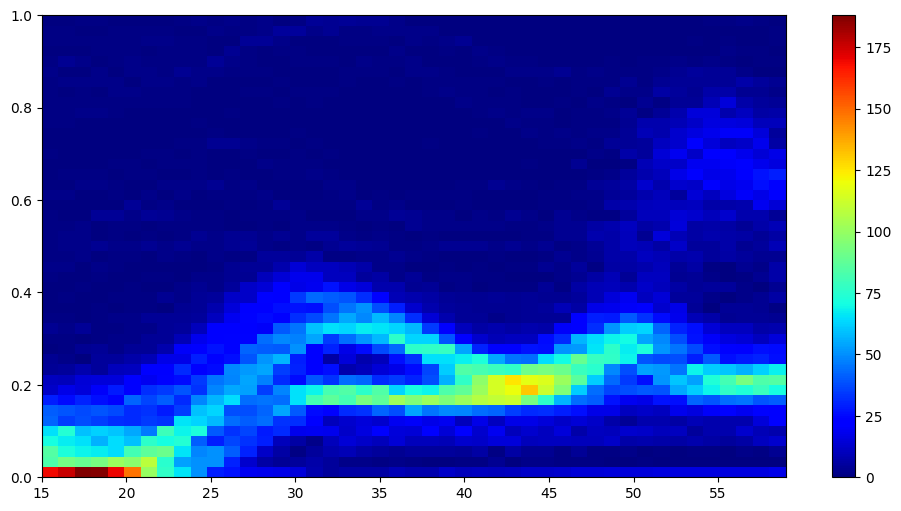

In [13]:
plot_hist(3,60,15,45)

225085
225085


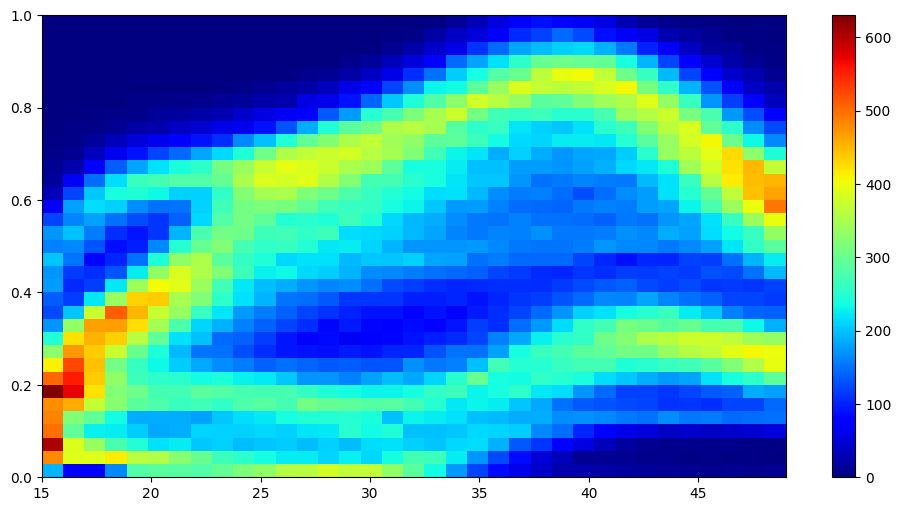

In [14]:
plot_hist(4,50,15,35)